<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Hybrid%20RF-LSTM%20for%2010%20class%20with%20k-fold%2C%20kernel%3D0.0001%2C%20Dropout%3D0.2%2C%20105%20epochs%20(01192024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hybrid RF-LSTM for 10 class classifications based on with k-fold, kernel=0.0001, Dropout=0.2**

In [1]:
#Imports various Python libraries necessary

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils import np_utils
#from keras.utils import np_utils
#from tensorflow.keras import np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

In [2]:
# Load dataset
dataset = pd.read_csv("dataset_P2.2.csv")
dataset.isnull().sum()

id                   0
dur                  0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
Class                0
dtype: int64

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   spkts              175341 non-null  int64  
 3   dpkts              175341 non-null  int64  
 4   sbytes             175341 non-null  int64  
 5   dbytes             175341 non-null  int64  
 6   rate               175341 non-null  float64
 7   sttl               175341 non-null  int64  
 8   dttl               175341 non-null  int64  
 9   sload              175341 non-null  float64
 10  dload              175341 non-null  float64
 11  sloss              175341 non-null  int64  
 12  dloss              175341 non-null  int64  
 13  sinpkt             175341 non-null  float64
 14  dinpkt             175341 non-null  float64
 15  sjit               175341 non-null  float64
 16  dj

In [4]:
#from keras.utils import np_utils
#Creates an instance of the LabelEncoder class and uses it to encode the 'Class' column of the dataset (dataset['Class']) into
#numerical labels. These labels are stored in the variable `y
encoder = LabelEncoder()
y = encoder.fit_transform(dataset['Class'])

#Converts the numerical labels in `y` to one-hot encoded vectors using the `np_utils.to_categorical` function.
#This is often done when dealing with multi-class classification problems.
y = np_utils.to_categorical(y, 10)  # update to 4 classes

#Removes the 'Class' column from the dataset, resulting in a DataFrame stored in `X`.
#Then, it converts the DataFrame to a NumPy array and stores it in `X`.
X = dataset.drop(['Class'], axis=1)
X = X.values

#Prints the shapes of the feature matrix `X` and the target variable `y`. This helps verify the dimensions of the data.
print(X.shape)
print(y.shape)

(175341, 40)
(175341, 10)


**Data Preprocessing**

In [5]:
# Data preprocessing

#Imports the Synthetic Minority Over-sampling Technique (SMOTE) from the imbalanced-learn (imblearn) library.
#It is used to address class imbalance by generating synthetic samples of the minority class.
#The code initializes a SMOTE object, `oversample`, and then applies SMOTE to oversample the dataset, which is stored back in `X` and `y`.
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [6]:
#Splits the dataset into training and testing sets using `train_test_split`. The training data (`X_train` and `y_train`) will contain 80% the data,
#and the testing data (`X_test` and `y_test`) will contain 20%. The `random_state` parameter is set for reproducibility in random data splitting.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
#This code essentially covers data loading, preprocessing (dealing with missing values and one-hot encoding), handling class imbalance using SMOTE,
#and splitting the data into training and testing sets for a machine learning or deep learning model.

In [7]:
from sklearn.model_selection import train_test_split, StratifiedKFold
# Define the number of classes
num_classes = 10

# Define the number of folds
num_folds = 10
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

In [8]:
# Initialize lists to store evaluation metrics for each fold
accuracies = []
recalls = []
precisions = []
f1scores = []
confusion_matrices = []
classification_reports = []

In [9]:
# Iterate through the folds
for fold, (train_index, test_index) in enumerate(skf.split(X, y.argmax(axis=1))):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

**Hybrid RF-LSTM for 4 class Ver.2.2**

In [10]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, TimeDistributed
from tensorflow.keras.regularizers import l2
import numpy as np

# Train RF model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Extract features from RF model
train_rf_features = rf_model.predict(X_train)
test_rf_features = rf_model.predict(X_test)

# Reshape RF features for LSTM input
train_rf_features = np.reshape(train_rf_features, (train_rf_features.shape[0], 1, train_rf_features.shape[1]))
test_rf_features = np.reshape(test_rf_features, (test_rf_features.shape[0], 1, test_rf_features.shape[1]))

In [30]:
# Train LSTM model with RF features
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(1, train_rf_features.shape[2]), return_sequences=True, kernel_regularizer=l2(0.0001)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(32, return_sequences=True, kernel_regularizer=l2(0.0001)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(16, kernel_regularizer=l2(0.0001)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(10, activation='softmax'))

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = lstm_model.fit(train_rf_features, y_train, epochs=105, batch_size=64, validation_split=0.2)

# Evaluate hybrid model on test set
test_lstm_features = lstm_model.predict(test_rf_features)
test_rf_lstm_predictions = np.argmax(test_lstm_features, axis=1)

#print(confusion_matrix(np.argmax(y_test, axis=1), test_rf_lstm_predictions))
#print(classification_report(np.argmax(y_test, axis=1), test_rf_lstm_predictions))

# Plot training/validation loss over each epoch
#plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation/Test Loss')
#plt.xlabel('Epoch')
#plt.ylabel('Loss')
#plt.legend()
#plt.show()

Epoch 1/105
6300/6300 [==============================] - 54s 7ms/step - loss: 0.1107 - accuracy: 0.9847 - val_loss: 1.3504 - val_accuracy: 0.5011
Epoch 2/105
6300/6300 [==============================] - 42s 7ms/step - loss: 0.0106 - accuracy: 0.9996 - val_loss: 0.1370 - val_accuracy: 1.0000
Epoch 3/105
6300/6300 [==============================] - 42s 7ms/step - loss: 0.0065 - accuracy: 0.9998 - val_loss: 0.0544 - val_accuracy: 1.0000
Epoch 4/105
6300/6300 [==============================] - 43s 7ms/step - loss: 0.0054 - accuracy: 0.9999 - val_loss: 0.0391 - val_accuracy: 1.0000
Epoch 5/105
6300/6300 [==============================] - 42s 7ms/step - loss: 0.0047 - accuracy: 0.9998 - val_loss: 0.0215 - val_accuracy: 1.0000
Epoch 6/105
6300/6300 [==============================] - 42s 7ms/step - loss: 0.0043 - accuracy: 0.9999 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 7/105
6300/6300 [==============================] - 44s 7ms/step - loss: 0.0042 - accuracy: 0.9999 - val_loss: 0.0067 -

In [31]:

# Calculate evaluation metrics
accuracy = accuracy_score(np.argmax(y_test, axis=1), test_rf_lstm_predictions)
recall = recall_score(np.argmax(y_test, axis=1), test_rf_lstm_predictions, average='weighted')
precision = precision_score(np.argmax(y_test, axis=1), test_rf_lstm_predictions, average='weighted')
f1score = f1_score(np.argmax(y_test, axis=1), test_rf_lstm_predictions, average='weighted')
confusion_mat = confusion_matrix(np.argmax(y_test, axis=1), test_rf_lstm_predictions)
classification_rep = classification_report(np.argmax(y_test, axis=1), test_rf_lstm_predictions, digits=6)

# Append metrics to lists
accuracies.append(accuracy)
recalls.append(recall)
precisions.append(precision)
f1scores.append(f1score)
confusion_matrices.append(confusion_mat)
classification_reports.append(classification_rep)

# Print metrics for each fold
print(f"\nMetrics for Fold {fold + 1}:\n")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-Score:", f1score)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)


Metrics for Fold 10:

Accuracy: 0.8513571428571428
Recall: 0.8513571428571428
Precision: 0.8770371829490619
F1-Score: 0.859217027789265
Confusion Matrix:
 [[5360    3    0   55    9  172    0    1    0    0]
 [   0 4010  203 1313   48   13    1   11    1    0]
 [   0  150 4103 1200   58   15    1   65    8    0]
 [   0  289  295 4081  746   53    6   96   32    2]
 [   0  110   91 1237 3953   61    7  101   33    7]
 [   7   58   53  394   45 4973    1   37   32    0]
 [   0    5    8   84   25    3 5471    2    2    0]
 [   0   69  189  636   75   30    0 4552   49    0]
 [   0    0    0   16    0    2    0    1 5581    0]
 [   0    0    0    6    2    0    0    0    0 5592]]
Classification Report:
               precision    recall  f1-score   support

           0   0.998696  0.957143  0.977478      5600
           1   0.854282  0.716071  0.779095      5600
           2   0.830231  0.732679  0.778410      5600
           3   0.452339  0.728750  0.558200      5600
           4   0.7

In [32]:
# Print average metrics across all folds
print("\nAverage Metrics Across Folds:\n")
print("Average Accuracy:", np.mean(accuracies))
print("Average Recall:", np.mean(recalls))
print("Average Precision:", np.mean(precisions))
print("Average F1-Score:", np.mean(f1scores))


Average Metrics Across Folds:

Average Accuracy: 0.8446919642857142
Average Recall: 0.8446919642857142
Average Precision: 0.86857149527584
Average F1-Score: 0.8485825147491524


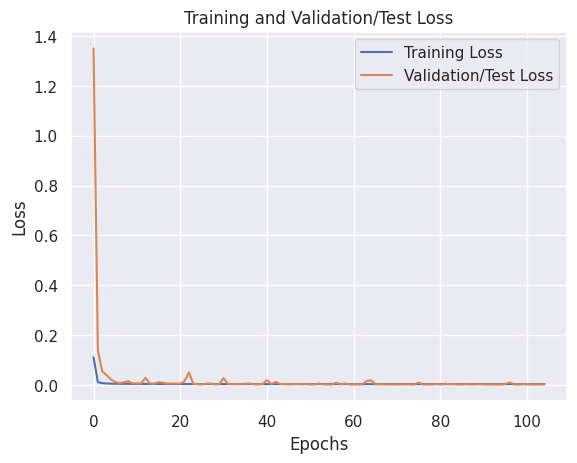

In [34]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation/Test Loss')
plt.title('Training and Validation/Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(8,6.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='bone')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms'])
  ax.yaxis.set_ticklabels(['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms'])
  plt.xticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees
  plt.yticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

Confusion Matrix of Hybrid RF-LSTM Model


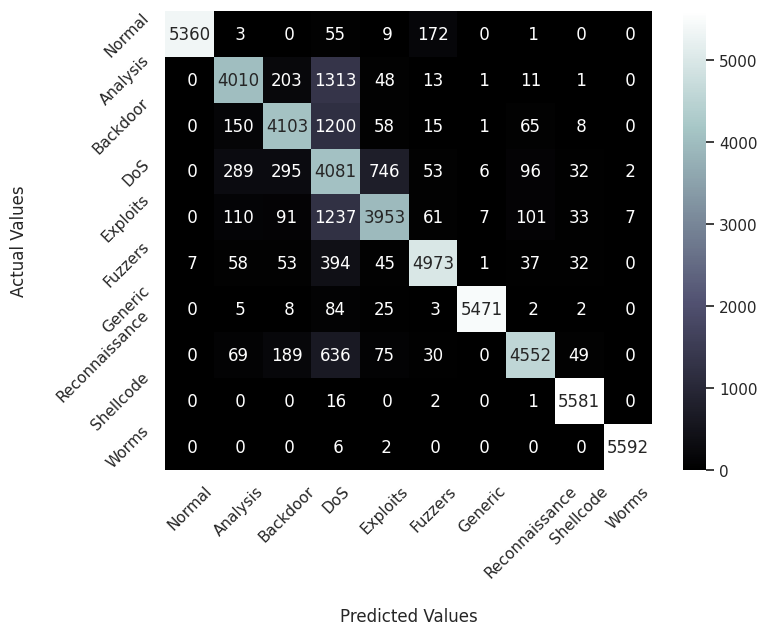

In [36]:
print("Confusion Matrix of Hybrid RF-LSTM Model")
conf_mat(np.argmax(y_test, axis=1), test_rf_lstm_predictions)

In [37]:
report = classification_report(np.argmax(y_test, axis=1), test_rf_lstm_predictions, output_dict=True)
detection_rates = {}
for cls in range(10):
    detection_rates[encoder.inverse_transform([cls])[0]] = report[str(cls)]['recall']
print("Detection rates of Hybrid RF-LSTM Model:", detection_rates)

Detection rates of Hybrid RF-LSTM Model: {0: 0.9571428571428572, 1: 0.7160714285714286, 2: 0.7326785714285714, 3: 0.72875, 4: 0.7058928571428571, 5: 0.8880357142857143, 6: 0.9769642857142857, 7: 0.8128571428571428, 8: 0.9966071428571428, 9: 0.9985714285714286}


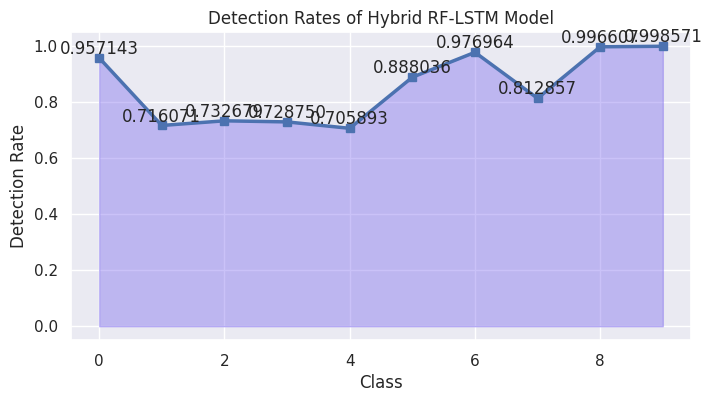

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

report = classification_report(np.argmax(y_test, axis=1), test_rf_lstm_predictions, output_dict=True)
detection_rates = {}
for cls in range(10):
    detection_rates[encoder.inverse_transform([cls])[0]] = report[str(cls)]['recall']

# Extract the class labels and detection rates
labels = list(detection_rates.keys())
rates = list(detection_rates.values())

# Plot the line graph with filled area and labels
plt.figure(figsize=(8, 4))
plt.plot(labels, rates, marker='s', linestyle='-', linewidth=2.5)
plt.fill_between(labels, rates, color='mediumslateblue', alpha=0.4)

# Add labels to each data point
for i in range(len(labels)):
    plt.text(labels[i], rates[i], "{:.6f}".format(rates[i]), ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('Detection Rate')
plt.title('Detection Rates of Hybrid RF-LSTM Model')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Class 0 - FPR: 0.000139, TPR: 0.957143
Class 1 - FPR: 0.013571, TPR: 0.716071
Class 2 - FPR: 0.016647, TPR: 0.732679
Class 3 - FPR: 0.098036, TPR: 0.728750
Class 4 - FPR: 0.020000, TPR: 0.705893
Class 5 - FPR: 0.006925, TPR: 0.888036
Class 6 - FPR: 0.000317, TPR: 0.976964
Class 7 - FPR: 0.006230, TPR: 0.812857
Class 8 - FPR: 0.003115, TPR: 0.996607
Class 9 - FPR: 0.000179, TPR: 0.998571


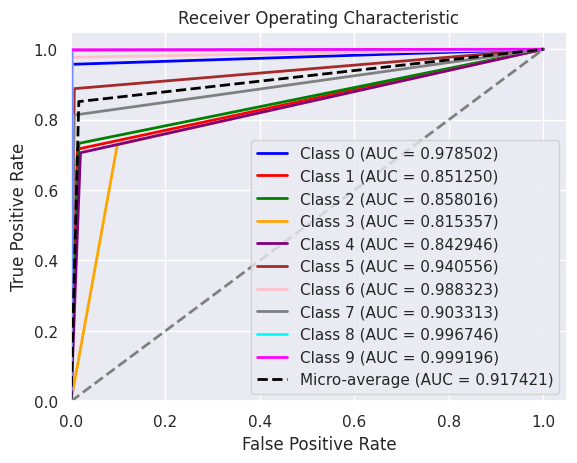

In [40]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
#from keras.utils import np_utils
from tensorflow.python.keras.utils import np_utils

# Convert y_test and test_rf_lstm_predictions to one-hot encoded format
y_test_onehot = np_utils.to_categorical(np.argmax(y_test, axis=1))
test_rf_lstm_predictions_onehot = np_utils.to_categorical(test_rf_lstm_predictions, num_classes=10)  # Convert to one-hot encoded format with 4 classes

# Compute the AUC and ROC curves for each class
n_classes = y_test_onehot.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], test_rf_lstm_predictions_onehot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_onehot.ravel(), test_rf_lstm_predictions_onehot.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Print False Positive Rate and True Positive Rate for each class
for i in range(n_classes):
    print(f"Class {i} - FPR: {fpr[i][1]:.6f}, TPR: {tpr[i][1]:.6f}")


# Plot the ROC curves
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']  # Adjust the colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.6f})'.format(i, roc_auc[i]))

# Plot the micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], color='black', lw=2, linestyle='--', label='Micro-average (AUC = {0:0.6f})'.format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print confusion matrix and classification report
##print(confusion_matrix(np.argmax(y_test_onehot, axis=1), np.argmax(test_rf_features_onehot, axis=1)))
##print(classification_report(np.argmax(y_test_onehot, axis=1), np.argmax(test_rf_features_onehot, axis=1)))